# problems with traditional ann

In [1]:
import tensorflow as tf
import seaborn as sns 
# Generate dummy data
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

11490434/11490434 [==============================] - 2s 0us/step


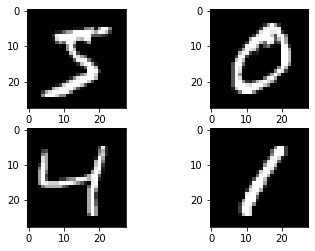

In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.shape[1]

28

In [6]:
X_train.shape[1] * X_train.shape[2]

784

In [8]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train.reshape(X_train.shape[0],num_pixels ).astype('float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train.shape

(60000, 784)

In [46]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes =10

In [11]:
num_classes=10
num_pixels=784

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1000, input_dim=num_pixels, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
59/59 [==============================] - 4s 56ms/step - loss: 0.4738 - accuracy: 0.8712 - val_loss: 0.2377 - val_accuracy: 0.9335
Epoch 2/10
59/59 [==============================] - 3s 53ms/step - loss: 0.1967 - accuracy: 0.9448 - val_loss: 0.1659 - val_accuracy: 0.9521
Epoch 3/10
59/59 [==============================] - 3s 52ms/step - loss: 0.1427 - accuracy: 0.9609 - val_loss: 0.1267 - val_accuracy: 0.9644
Epoch 4/10
59/59 [==============================] - 3s 54ms/step - loss: 0.1095 - accuracy: 0.9691 - val_loss: 0.1070 - val_accuracy: 0.9682
Epoch 5/10
59/59 [==============================] - 3s 55ms/step - loss: 0.0878 - accuracy: 0.9761 - val_loss: 0.0960 - val_accuracy: 0.9711
Epoch 6/10
59/59 [==============================] - 3s 53ms/step - loss: 0.0721 - accuracy: 0.9805 - val_loss: 0.0932 - val_accuracy: 0.9724
Epoch 7/10
59/59 [==============================] - 3s 57ms/step - loss: 0.0599 - accuracy: 0.9835 - val_loss: 0.0806 - val_accuracy: 0.9747
Epoch 8/10
59

In [17]:
(X_train1, y_train), (X_test1, y_test) = tf.keras.datasets.mnist.load_data()

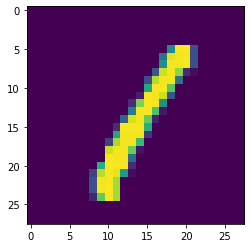

In [18]:
pic=np.zeros((28,28))
pic=X_train1[3,:,:].copy()
pic2=X_train1[3,:,:].copy()
plt.imshow(pic)

In [19]:
np.argmax(model.predict(pic.reshape(1,784)))

1/1 [==============================] - 0s 146ms/step


1

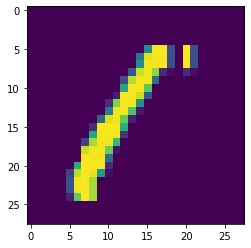

In [20]:
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+3]
plt.imshow(pic)

In [21]:
np.argmax(model.predict(pic.reshape(1,784)))

1/1 [==============================] - 0s 16ms/step


0

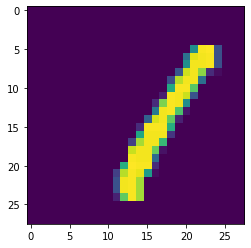

In [22]:
pic=np.zeros((28,28))

for i in range(pic.shape[0]):
  if  (i<25):
    pic[:,i+3]=pic2[:,i]
plt.imshow(pic)

In [24]:
np.argmax(model.predict(pic.reshape(1,784)))

1/1 [==============================] - 0s 51ms/step


4

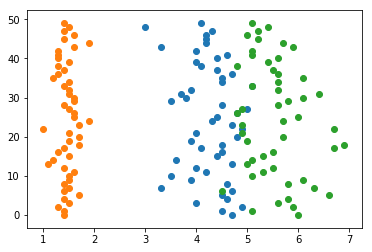

In [45]:
# plt.scatter(iris[iris["species"]==1].iloc[:,2],range(50))
# plt.scatter(iris[iris["species"]==0].iloc[:,2],range(50))
# plt.scatter(iris[iris["species"]==2].iloc[:,2],range(50))

# Convolution Neural Network

## Flattening an image 

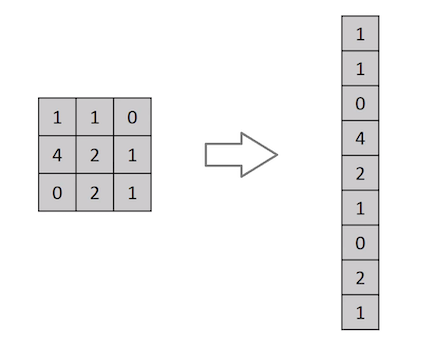

## convolutions 3*3

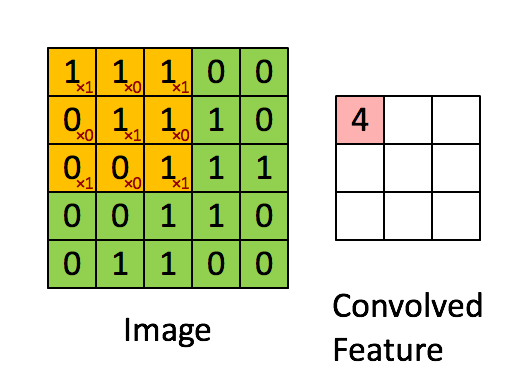

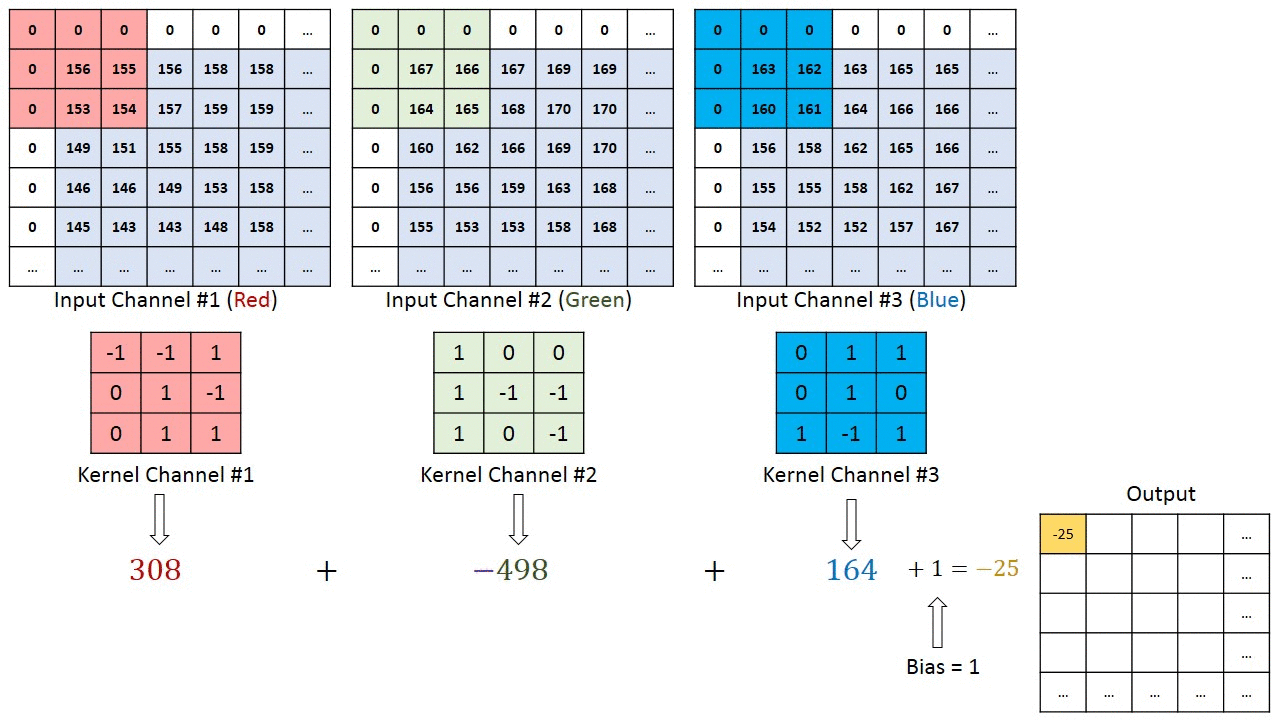

## maxpooling

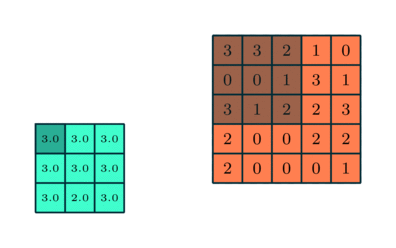

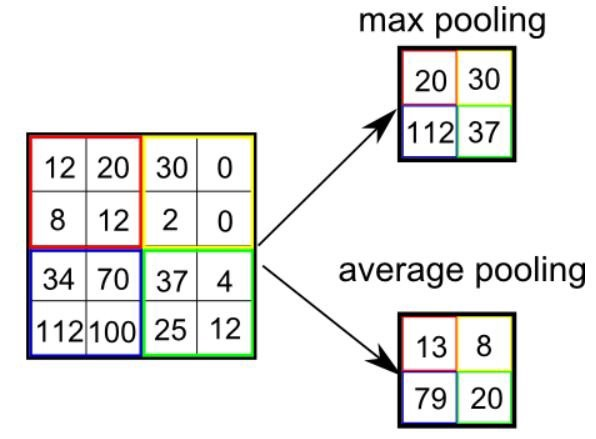 

In [27]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import keras.backend as k
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() #everytime loading data won't be so easy :)

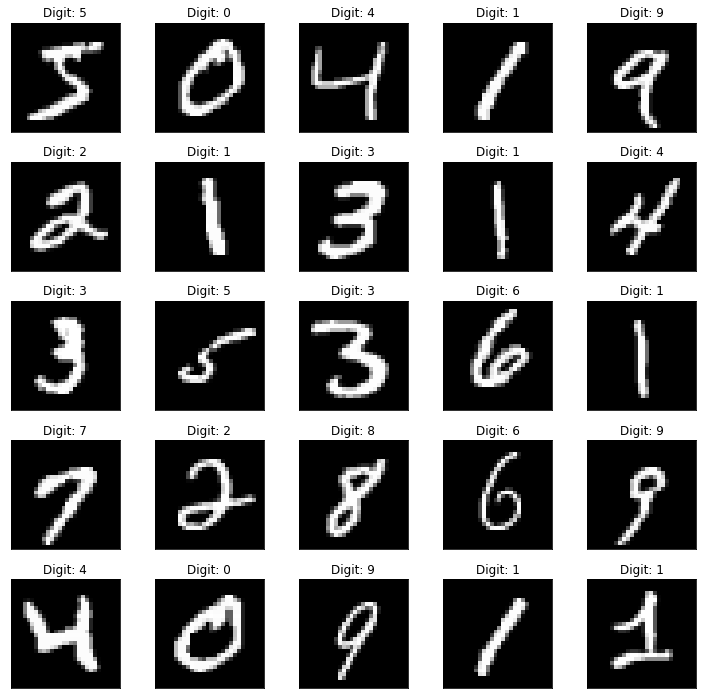

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
img_rows, img_cols=28,28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [14]:
# #For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
# #"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
# img_rows, img_cols=28,28
# if tf.keras.image_data_format() == 'channels_first':
#     X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#     X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#     X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)
# #more reshaping
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255
# print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

In [36]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_category)
# y_test = keras.utils.to_categorical(y_test, num_category)

In [16]:
# input  (28,28,1)
# conv1 (3,3)  #32 #26,26,32  #para 10*32
# conv2 (3,3)  #64  #24,24,64 # (9*32+1)*64
# MaxPooling2D (2,2) strides=1
# model.add(Dropout(0.25))
# #a,b,c
# flatten length a*b*c #24*24*64
# dense1 128 #128 #128*(24*24*64)+128
# model.add(Dropout(0.5))
# dense2 10 #128*10+10





In [37]:
model = tf.keras.models.Sequential()
#convolutional layer with rectified linear unit activation
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))
#randomly turn neurons on and off to improve convergence
model.add(tf.keras.layers.Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(tf.keras.layers.Flatten())
#fully connected to get all relevant data
model.add(tf.keras.layers.Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(tf.keras.layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(tf.keras.layers.Dense(num_category, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [39]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [40]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 119s 252ms/step - loss: 2.2653 - accuracy: 0.1582 - val_loss: 2.2157 - val_accuracy: 0.2976
Epoch 2/10
469/469 [==============================] - 136s 290ms/step - loss: 2.1835 - accuracy: 0.2801 - val_loss: 2.1088 - val_accuracy: 0.4869
Epoch 3/10
469/469 [==============================] - 151s 321ms/step - loss: 2.0719 - accuracy: 0.3891 - val_loss: 1.9639 - val_accuracy: 0.5999
Epoch 4/10
469/469 [==============================] - 122s 259ms/step - loss: 1.9275 - accuracy: 0.4717 - val_loss: 1.7850 - val_accuracy: 0.6754
Epoch 5/10
469/469 [==============================] - 117s 249ms/step - loss: 1.7591 - accuracy: 0.5346 - val_loss: 1.5809 - val_accuracy: 0.7255
Epoch 6/10
469/469 [==============================] - 109s 233ms/step - loss: 1.5808 - accuracy: 0.5825 - val_loss: 1.3725 - val_accuracy: 0.7587
Epoch 7/10
469/469 [==============================] - 111s 236ms/step - loss: 1.4143 - accuracy: 0.6164 - val_loss: 1.1850 -

In [41]:
model.layers

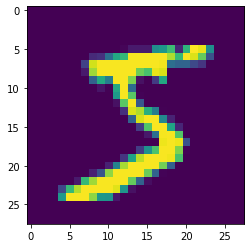

In [42]:
plt.imshow(X_train[0][:,:,0])

1/1 [==============================] - 0s 94ms/step


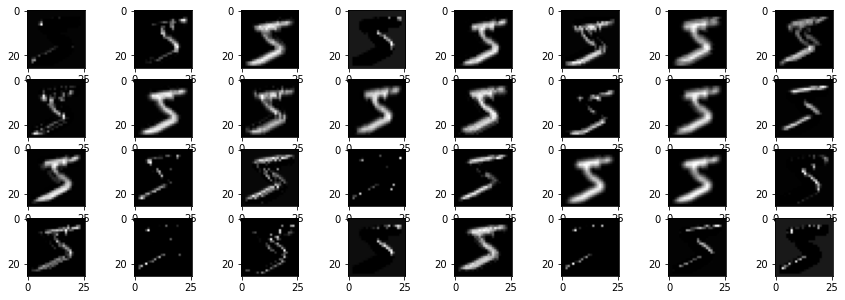

In [43]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

1/1 [==============================] - 0s 68ms/step


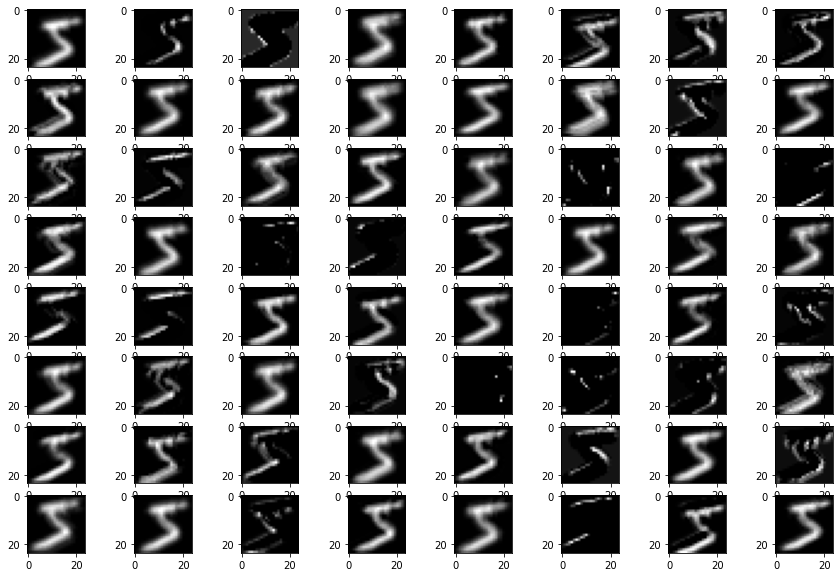

In [45]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

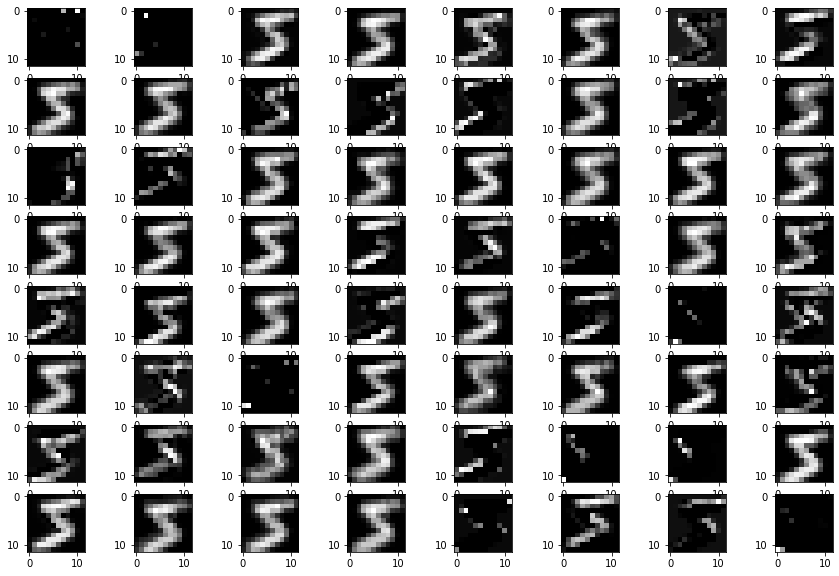

In [27]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

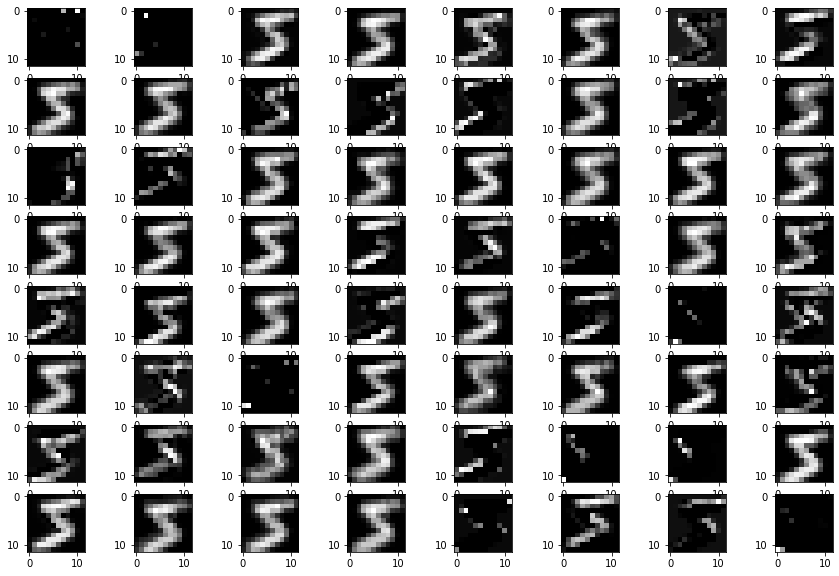

In [28]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)
#model2.summary()
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

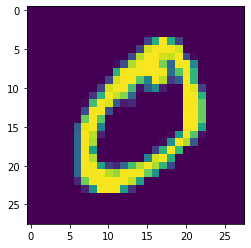

In [46]:
plt.imshow(X_train[1][:,:,0])

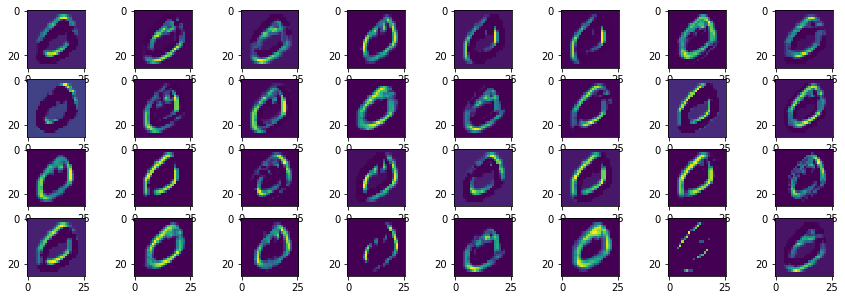

In [33]:
model2 = Model(inputs=model.inputs, outputs=model.layers[0].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

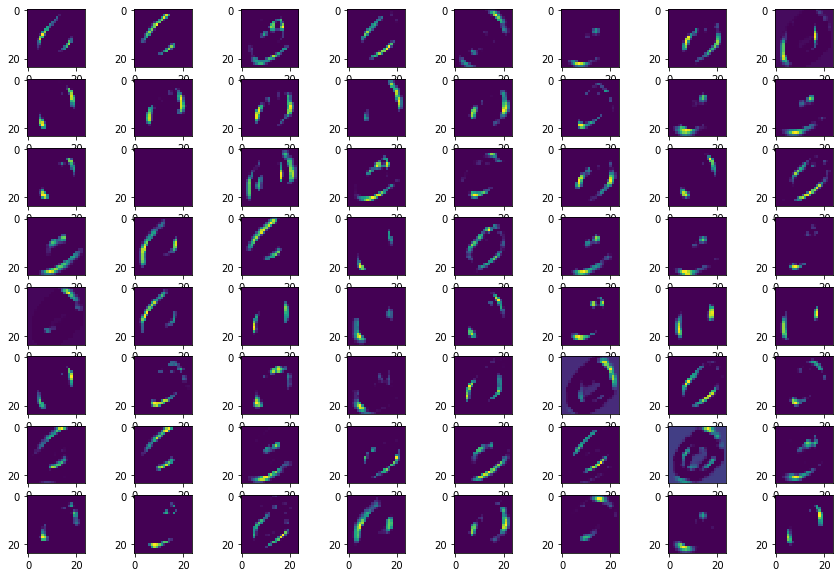

In [34]:
model2 = Model(inputs=model.inputs, outputs=model.layers[1].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

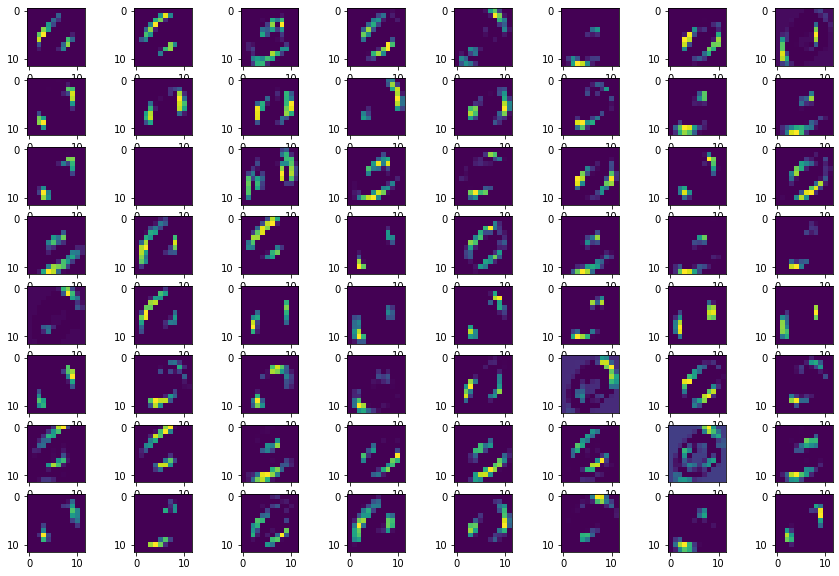

In [35]:
model2 = Model(inputs=model.inputs, outputs=model.layers[2].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

In [1]:
64*9+1

577

In [2]:
10*9+1

91

In [3]:
91/577

0.15771230502599654

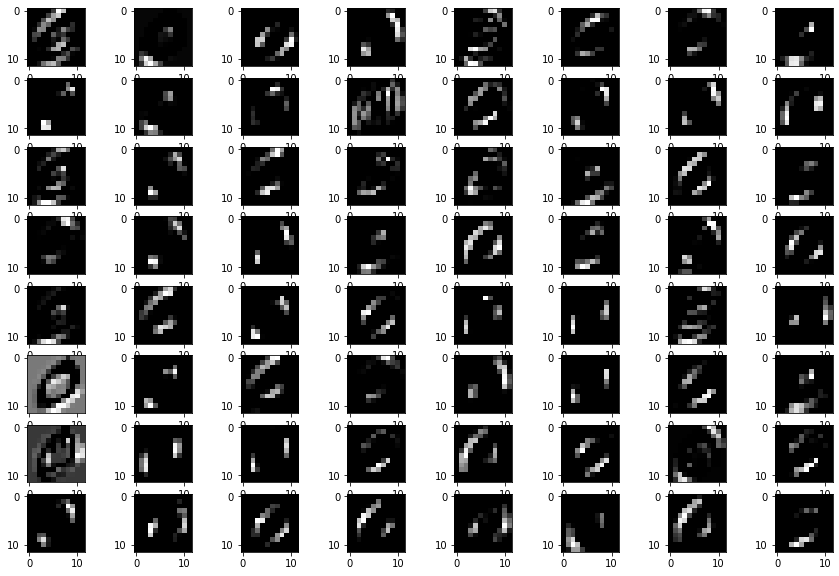

In [21]:
model2 = Model(inputs=model.inputs, outputs=model.layers[3].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    